<a href="https://colab.research.google.com/github/parksj003/LG-CNN-Lecture/blob/master/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [ ]:
import gdown
gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/02/6d7d571f-916b-4ae9-af2e-072297cd4869.zip',
               output='dataset.zip', quiet=True)
!unzip dataset.zip -d .

import matplotlib.pyplot as plt
plt.style.use(['classic'])
 #'seaborn-dark', 'dark_background', fivethirtyeight', 'ggplot', 'bmh', 'classi

# 1.Data Preprocessing

In [ ]:
import os, shutil

In [ ]:
original_dataset_dir = '/content/datasets/cats_and_dogs/train'
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
#validation 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#validation 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
#test 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#test 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
#처음 1000개 고양이 이미지 : train
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#500개 고양이 이미지 : validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)   
    
#500개 고양이 이미지 : test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [ ]:
#처음 1000개 개 이미지 : train
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#500개 개 이미지 : validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)   
    
#500개 개 이미지 : test
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [ ]:
print('훈련용 고양이 이미지 개수:',len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 개수:',len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 개수:',len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 개수:',len(os.listdir(validation_dogs_dir)))
print('훈련용 고양이 이미지 개수:',len(os.listdir(test_cats_dir)))
print('훈련용 강아지 이미지 개수:',len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 개수: 1000
훈련용 강아지 이미지 개수: 1000
검증용 고양이 이미지 개수: 500
검증용 강아지 이미지 개수: 500
훈련용 고양이 이미지 개수: 500
훈련용 강아지 이미지 개수: 500


# 2.CDDataModelEx1

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

In [ ]:
base_dir = '/content/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = train_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
    #binary => 0, 1 1차원배열
    #sparse => 정수 레이블 1차원 배열
    #categorical => one hot encoding 2차원 배열
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
result = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
 50/100 [==============>...............] - 6s 112ms/step - loss: 0.6943 - accuracy: 0.4910 - val_loss: 0.6825 - val_accuracy: 0.5000


In [ ]:
model.save('cat_and_dogs_small_1.h5')

x_len = range(len(result.history['accuracy']))
plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'ro', label='validation_accuracy')
plt.legend(loc='best')
plt.title('accuracy')
plt.figure()
plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'ro', label='validation_loss')
plt.legend(loc='best')
plt.title('loss')
plt.show()


# 3.ImageDtaGeneratorEx

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from tensorflow.keras.preprocessing import image
train_cats_dir = os.path.join(train_dir, 'cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
print(x.shape)

(1, 150, 150, 3)


In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=3):
    plt.figure(i)
    imgpot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

# 4.cdModelEx2


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

In [ ]:
base_dir = '/content/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = train_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(   
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
    #binary => 0, 1 1차원배열
    #sparse => 정수 레이블 1차원 배열
    #categorical => one hot encoding 2차원 배열
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
result = model.fit_generator(
    train_generator,
    steps_per_epoch=51,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

In [ ]:
model.save('cat_and_dogs_small_1.h5')

x_len = range(len(result.history['accuracy']))
plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'ro', label='validation_accuracy')
plt.legend(loc='best')
plt.title('accuracy')
plt.figure()
plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'ro', label='validation_loss')
plt.legend(loc='best')
plt.title('loss')
plt.show()
    

# 5.VGG16AddModelEx1

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

# 6.VGG16AddModelEx2

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

In [ ]:
base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150,150,3))

In [ ]:
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )

    i = 0
    for input_batch, label_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size: (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = label_batch
        i+=1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))
model = models.Sequential()
# model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['accuracy'])

result = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

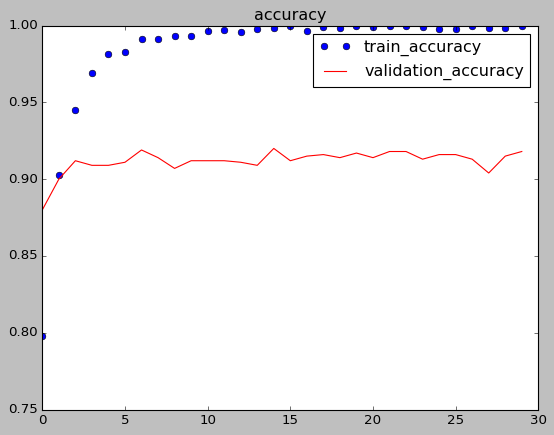

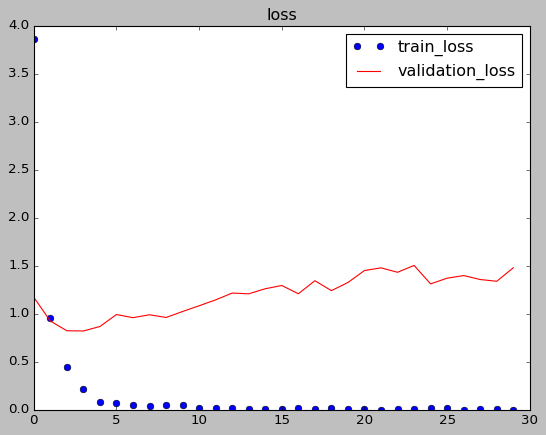

In [ ]:
x_len = range(len(result.history['accuracy']))
plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'r', label='validation_accuracy')
plt.legend()
plt.title('accuracy')
plt.figure()
plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'r', label='validation_loss')
plt.legend()
plt.title('loss')
plt.show()

# 7.VGG16AddModelEx3


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
import cv2

In [ ]:
base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)

conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150,150,3))

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
model.summary()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validata_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validata_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['accuracy'])
result = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

In [ ]:
x_len = range(len(result.history['accuracy']))
plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'r', label='validation_accuracy')
plt.legend()
plt.title('accuracy')
plt.figure()
plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'r', label='validation_loss')
plt.legend()
plt.title('loss')
plt.show()

# 8.VGG16AddModelEx4


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

In [ ]:
base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)

conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150,150,3))

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validata_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validata_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        
    if set_trainable:
        layer.trainable = True              
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

In [ ]:
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['accuracy'])
result = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

In [ ]:
x_len = range(len(result.history['accuracy']))
plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'r', label='validation_accuracy')
plt.legend()
plt.title('accuracy')
plt.figure()
plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'r', label='validation_loss')
plt.legend()
plt.title('loss')
plt.show()

In [ ]:
base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validata_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validata_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

conv_base.trainable = True

for layer in conv_base.layers:
    set_trainable = False
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['accuracy'])

result = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

x_len = range(len(result.history['accuracy']))

plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'r', label='validation_accuracy')
plt.legend()
plt.title('accuracy')
plt.figure()

plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'r', label='validation_loss')
plt.legend()
plt.title('loss')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import gdown
gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/02/f4279081-b4dd-4eb8-a3c0-1db817dd081a.zip',
               output='trained_cnn.zip', quiet=True)
!unzip trained_cnn.zip -d .

In [ ]:
model = load_model('/content/cats_and_dogs_small_2.h5')

In [ ]:
img_path = './datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model.summary()

In [ ]:
model.input

<tf.Tensor 'conv2d_input_1:0' shape=(None, 150, 150, 3) dtype=float32>

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0,:,:,19],cmap='viridis')
plt.matshow(first_layer_activation[0,:,:,16],cmap='viridis')
plt.show()

In [ ]:
activation_model.input

<tf.Tensor 'conv2d_input_1:0' shape=(None, 150, 150, 3) dtype=float32>

In [ ]:
128/16

8.0

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

ges_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0:, : , : , col*images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *=64
            channel_image +=128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

In [ ]:
x = layers.Input(shape=(150, 150, 3))
h1 = layers.Conv2D(3, (3,3) )(x)
h2 = layers.Conv2D(6, (3,3) )(x)
h3 = layers.Conv2D(9, (3,3) )(x)
mm = models.Model(x,  h3)
mm.layers

In [ ]:
mm.predict(img_tensor)[2].shape

(1, 148, 148, 9)

# HW day3

In [ ]:
import gdown
gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/07/29/9cefd310-e787-4a87-9c0b-78d46f2a0fe4.zip',
               output='test_img.zip', quiet=True)
!unzip test_img.zip -d .

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

Archive:  test_img.zip
  inflating: ./test-car.jpg          


170500096/170498071 [==============================] - 4s 0us/step


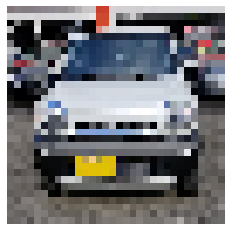

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

# imag_gen = ImageDataGenerator(rescale=1/255.0)
# train_gen = imag_gen.flow(x=X_train, y=y_train, batch_size=20)

img_test = image.load_img('/content/test-car.jpg', target_size=(32, 32))
img_test = image.img_to_array(img_test)
img_test = np.expand_dims(img_test, axis=0)

plt.figure()
plt.imshow(img_test[0,:]/255.0)
plt.axis('off')
plt.show()

In [ ]:
x = layers.Input(shape=(32, 32, 3))
h = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
# h = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(h)
h = layers.MaxPool2D(strides=(2,2))(h)
h = layers.Dropout(rate=0.3)(h)

h = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(h)
# h = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(h)
h = layers.MaxPool2D(strides=(2,2))(h)
h = layers.Dropout(rate=0.3)(h)

h = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(h)
# h = layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(h)
h = layers.MaxPool2D( strides=(2,2))(h)
h = layers.Dropout(rate=0.3)(h)

h = layers.Flatten()(h)
h = layers.Dense(256, activation='relu')(h)
h = layers.Dropout(rate=0.3)(h)
y = layers.Dense(10, activation='softmax')(h)

model = Model(x, y, name='my_model')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 128)         0  

In [ ]:
x = layers.Input(shape=(32, 32, 3))
h = layers.Flatten()(x)
h = layers.Dense(512, activation='relu')(h)
h = layers.Dropout(rate=0)(h)
h = layers.Dense(256, activation='relu')(h)
# h = layers.Dropout(rate=0.3)(h)
h = layers.Dense(128, activation='relu')(h)
h = layers.Dropout(rate=0)(h)
h = layers.Dense(64, activation='relu')(h)
# h = layers.Dropout(rate=0.3)(h)
y = layers.Dense(10, activation='softmax')(h)
model = Model(x,y)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)             

In [ ]:
result = model.fit(x=X_train, y=y_train, batch_size=20, epochs=20, validation_split=0.2)

Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.9203 - accuracy: 0.2952 - val_loss: 1.8855 - val_accuracy: 0.3228
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.7524 - accuracy: 0.3695 - val_loss: 1.7533 - val_accuracy: 0.3707
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.6702 - accuracy: 0.3995 - val_loss: 1.7076 - val_accuracy: 0.4013
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.6173 - accuracy: 0.4193 - val_loss: 1.6978 - val_accuracy: 0.3950
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.5624 - accuracy: 0.4402 - val_loss: 1.6137 - val_accuracy: 0.4301
Epoch 6/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.5305 - accuracy: 0.4484 - val_loss: 1.5794 - val_accuracy: 0.4408
Epoch 7/20
2000/2000 [==============================] - 6s 3ms/step - loss: 1.5022 - accuracy: 0.4604 - val_loss: 1.6147 - val_accuracy:

In [ ]:
model.save('./dnn_model.h5')

del model

model.load_weights('.')
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("predicted item: {}".format(labels[np.argmax(model.predict(img_test))]))

predicted item: automobile


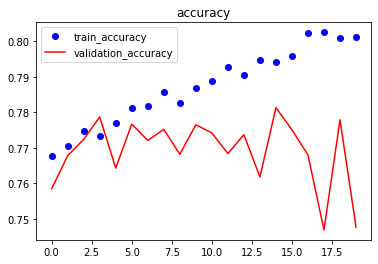

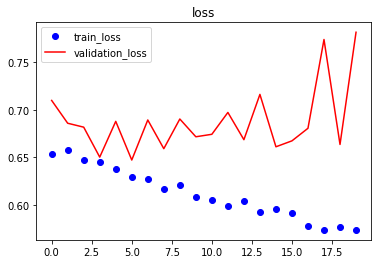

In [ ]:
x_len = range(len(result.history['accuracy']))
plt.plot(x_len, result.history['accuracy'], 'bo', label='train_accuracy')
plt.plot(x_len, result.history['val_accuracy'], 'r', label='validation_accuracy')
plt.legend(loc='best')
plt.title('accuracy')
plt.figure()
plt.plot(x_len, result.history['loss'], 'bo', label='train_loss')
plt.plot(x_len, result.history['val_loss'], 'r', label='validation_loss')
plt.legend(loc='best')
plt.title('loss')
plt.show()